In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
import statsmodels.api as sm

sns.set_style('whitegrid')

# Data Preperation

In [ ]:
match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')
match_info_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_info_data.csv')

<ipython-input-3-3623322840>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')


In [ ]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [ ]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [ ]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [ ]:
match_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [ ]:
match_info_data['date'] = pd.to_datetime(match_info_data['date'], errors='coerce')

In [ ]:
team_runs_per_match = match_data.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()
team_runs_per_match.rename(columns={'runs_off_bat':'total_runs'},inplace=True)
team_runs_per_match                            # total runs of each team grouped by match-id

,match_id,batting_team,total_runs
0,335982,Kolkata Knight Riders,205
1,335982,Royal Challengers Bangalore,63
2,335983,Chennai Super Kings,234
3,335983,Kings XI Punjab,196
4,335984,Delhi Daredevils,122
...,...,...,...
2040,1370351,Mumbai Indians,166
2041,1370352,Gujarat Titans,223
2042,1370352,Mumbai Indians,164
2043,1370353,Chennai Super Kings,166


In [ ]:
merged = pd.merge(team_runs_per_match, match_info_data[['id', 'date', 'team1', 'team2']], left_on='match_id', right_on='id')
merged.drop(columns=['id'], inplace=True)
merged['date'] = pd.to_datetime(merged['date'])
merged['period'] = merged['date'].dt.year.apply(lambda x: 'pre' if x < 2018 else 'post')                 # matches played before 2018 are in pre era and others in post
merged['run rate'] = merged['total_runs'] / 20
merged['year'] = merged['date'].dt.year
merged

,match_id,batting_team,total_runs,date,team1,team2,period,run rate,year
0,335982,Kolkata Knight Riders,205,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,10.25,2008
1,335982,Royal Challengers Bangalore,63,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,3.15,2008
2,335983,Chennai Super Kings,234,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,11.70,2008
3,335983,Kings XI Punjab,196,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,9.80,2008
4,335984,Delhi Daredevils,122,2008-04-19,Delhi Daredevils,Rajasthan Royals,pre,6.10,2008
...,...,...,...,...,...,...,...,...,...
2040,1370351,Mumbai Indians,166,2023-05-24,Mumbai Indians,Lucknow Super Giants,post,8.30,2023
2041,1370352,Gujarat Titans,223,2023-05-26,Gujarat Titans,Mumbai Indians,post,11.15,2023
2042,1370352,Mumbai Indians,164,2023-05-26,Gujarat Titans,Mumbai Indians,post,8.20,2023
2043,1370353,Chennai Super Kings,166,2023-05-29,Gujarat Titans,Chennai Super Kings,post,8.30,2023


# Normality Check

## for total runs made in pre and post era

In [ ]:
# normality check

from scipy.stats import shapiro

stat_pre, p_pre = shapiro(merged[merged['period'] == 'pre']['total_runs'])
print(f'shapiro wilk test statastics for pre period runs: {stat_pre}')
print(f'shapiro wilk test p value for pre period runs: {p_pre}')

stat_post, p_post = shapiro(merged[merged['period']=='post']['total_runs'])
print(f'shapiro wilk test statastics for post period runs: {stat_post}')
print(f'shapiro wilk test p value for post period runs: {p_post}')

print()
print('-----------------------conclusion-----------------------')
print()

if p_pre < 0.05:
  print('pre period runs are not normally distributed')
else:
  print('pre period runs are normally distributed')

if p_post < 0.05:
  print('post period runs are not normally distributed')
else:
  print('post period runs are normally distributed')

shapiro wilk test statastics for pre period runs: 0.9918832296135232
shapiro wilk test p value for pre period runs: 1.8503752380697274e-06
shapiro wilk test statastics for post period runs: 0.9918551537781701
shapiro wilk test p value for post period runs: 0.00028915925992835427

-----------------------conclusion-----------------------

pre period runs are not normally distributed
post period runs are not normally distributed


**Conclusion**: Since data in not normally distributed we will use non-paramatric tests like mann-whitney U test

In [ ]:
match_counts = match_info_data.groupby(match_info_data['date'].dt.year)['id'].nunique().reset_index()   # no of matches in each season
match_counts.columns = ['season', 'match count']
match_counts.set_index('season', inplace=True)
match_counts.head()

,match count
season,
2008,58
2009,57
2010,60
2011,73
2012,74


# deviding data into playoffs and leugue mathces

In [ ]:
# give each match its number season wise.
# so match in season 2023 having rank 34, is the 34th match played in 2023 season.
# since we have rank of each match, we can find the last four match played, which are the playoffs.

match_info_data['match_number'] = match_info_data.groupby('season')['date'].rank(method='first', ascending=True)

match_info_data['season'] = match_info_data['date'].dt.year
match_info_data['match count'] = match_info_data['season'].map(match_counts['match count'])  # no of match in each seasons

match_info_data['is_playoff'] = match_info_data['match_number'] > (match_info_data['match count'] - 4)  # last four matches in that season

match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_number,match count,is_playoff
0,1370353,2023,Ahmedabad,2023-05-29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,...,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,74.0,74,True
1,1370352,2023,Ahmedabad,2023-05-26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,...,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,73.0,74,True
2,1370351,2023,Chennai,2023-05-24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,...,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney,72.0,74,True
3,1370350,2023,Chennai,2023-05-23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,...,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford,71.0,74,True
4,1359543,2023,Mumbai,2023-05-21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit,69.0,74,False


In [ ]:
merged = pd.merge(merged, match_info_data[['id', 'is_playoff']], left_on='match_id', right_on='id' )
merged.drop(columns=['id'], inplace=True)
merged

,match_id,batting_team,total_runs,date,team1,team2,period,run rate,year,is_playoff
0,335982,Kolkata Knight Riders,205,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,10.25,2008,False
1,335982,Royal Challengers Bangalore,63,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,3.15,2008,False
2,335983,Chennai Super Kings,234,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,11.70,2008,False
3,335983,Kings XI Punjab,196,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,9.80,2008,False
4,335984,Delhi Daredevils,122,2008-04-19,Delhi Daredevils,Rajasthan Royals,pre,6.10,2008,False
...,...,...,...,...,...,...,...,...,...,...
2040,1370351,Mumbai Indians,166,2023-05-24,Mumbai Indians,Lucknow Super Giants,post,8.30,2023,True
2041,1370352,Gujarat Titans,223,2023-05-26,Gujarat Titans,Mumbai Indians,post,11.15,2023,True
2042,1370352,Mumbai Indians,164,2023-05-26,Gujarat Titans,Mumbai Indians,post,8.20,2023,True
2043,1370353,Chennai Super Kings,166,2023-05-29,Gujarat Titans,Chennai Super Kings,post,8.30,2023,True


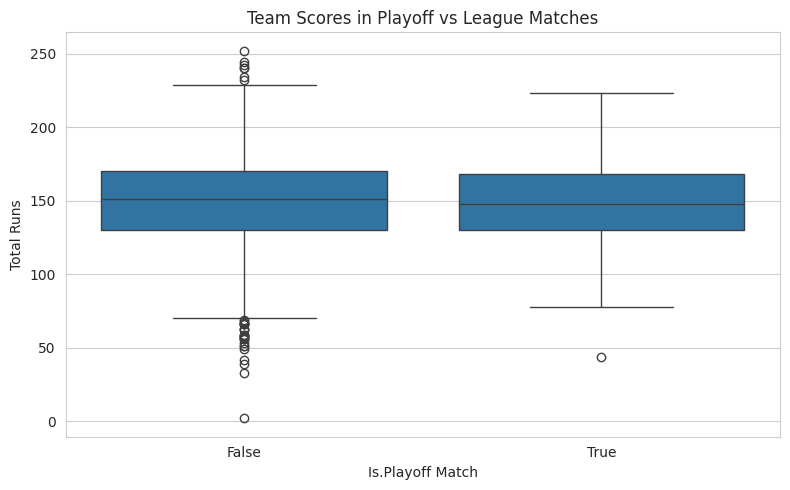

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_playoff', y='total_runs')
plt.title("Team Scores in Playoff vs League Matches")
plt.xlabel("Is.Playoff Match")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

# Mann-Whitney U test on total runs made.

In [ ]:
# applying mann-whitney U test to ckeck wether runs made in playoffs are any different from runs made in leugue matches

from scipy.stats import mannwhitneyu

league_scores = merged[merged['is_playoff'] == False]['total_runs']
playoff_scores = merged[merged['is_playoff'] == True]['total_runs']

u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')
print(f"Mann-whitney U Statistic: {u_statistic}")
print(f"p-value: {p_value}")

print()
print('-----------------------conclusion-----------------------')
print()

if p_value < 0.05:
  print('There is a significant difference in team scores between league matches and playoff matches.')
else:
  print('There is no significant difference in team scores between league matches and playoff matches.')

Mann-whitney U Statistic: 124606.0
p-value: 0.7668706992141119

-----------------------conclusion-----------------------

There is no significant difference in team scores between league matches and playoff matches.


**Conclusion**: Since p value is >0.05, we conclude that there is no significant difference in runs made in playoffs and runs made in leugue matches.

In [ ]:
# checking wether Mumbai Indians play differently in leugue and playoffs.

team_name = "Mumbai Indians"

team_data = merged[merged['batting_team'] == team_name]

league_scores = team_data[team_data['is_playoff' ] == False]['total_runs' ]
playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative="two-sided")

print(f"Team: {team_name}")
print(f"Mann-whitney U Statistic: {u_statistic}")
print(f"p-value: {p_value}")

print()
print('-----------------------conclusion-----------------------')
print()

if p_value < 0.05:
  print('There is a significant difference in team scores between league matches and playoff matches.')
else:
  print('There is no significant difference in team scores between league matches and playoff matches.')

Team: Mumbai Indians
Mann-whitney U Statistic: 2618.0
p-value: 0.43492719055870244

-----------------------conclusion-----------------------

There is no significant difference in team scores between league matches and playoff matches.


**Conclusion**: Mumbai Indians play consistently throughout the leugue and playoffs.

In [ ]:
# checking for every match

team_names = merged['batting_team'].unique()

for team in team_names:
  team_data = merged[merged['batting_team'] == team]

  league_scores = team_data[team_data['is_playoff' ] == False]['total_runs' ]
  playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

  if len(league_scores) > 0 and len(playoff_scores) > 0:
    u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative="two-sided")

    print()
    print('--------------------------------------------------------------------------------------------')
    print()
    print(f"Team: {team}")
    print(f"Mann-whitney U Statistic: {u_statistic}")
    print(f"p-value: {p_value}")

    print()
    print('-----------------------conclusion-----------------------')
    print()

    if p_value < 0.05:
      print(f'There is a significant difference in team scores between league matches and playoff matches of team {team}.')
    else:
      print(f'There is no significant difference in team scores between league matches and playoff matches of team {team}.')
  else:
    print()
    print('--------------------------------------------------------------------------------------------')
    print()
    print(f"Team: {team}")
    print('insuffcient data!')


--------------------------------------------------------------------------------------------

Team: Kolkata Knight Riders
Mann-whitney U Statistic: 1511.0
p-value: 0.8205743959432932

-----------------------conclusion-----------------------

There is no significant difference in team scores between league matches and playoff matches of team Kolkata Knight Riders.

--------------------------------------------------------------------------------------------

Team: Royal Challengers Bangalore
Mann-whitney U Statistic: 2112.0
p-value: 0.4336911417202931

-----------------------conclusion-----------------------

There is no significant difference in team scores between league matches and playoff matches of team Royal Challengers Bangalore.

--------------------------------------------------------------------------------------------

Team: Chennai Super Kings
Mann-whitney U Statistic: 2261.0
p-value: 0.3326928611823903

-----------------------conclusion-----------------------

There is no s

**Conclusion**: There is no team which plays differently in leugue and playoff matches.

# Mann-Whitney U test on run-rates!

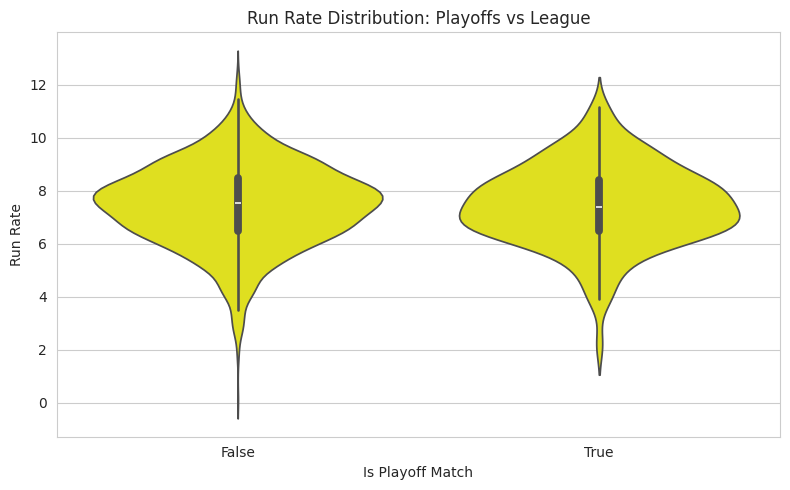

In [ ]:
# comparing distribution of run-rates in playoff and leugue matches.
plt.figure(figsize=(8, 5))
sns.violinplot(data=merged, x='is_playoff', y='run rate', color='yellow')
plt.title("Run Rate Distribution: Playoffs vs League")
plt.xlabel("Is Playoff Match")
plt.ylabel("Run Rate")
plt.tight_layout()
plt.show()

**Conclusion**: Both distribution of run-rates in playoffs and leugue are somewhat same.

In [ ]:
# mann-whitney U test for run-rate

league_run_rates = merged[merged['is_playoff'] == False]['run rate']
playoff_run_rates = merged[merged['is_playoff'] == True]['run rate']

u_statistic, p_value = mannwhitneyu(league_run_rates, playoff_run_rates, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
  print("The difference in run rates between playoffs and league matches is statistically significant.")
else:
  print("No statistically significant difference in run rates between playoffs and league matches.")

Mann-Whitney U Statistic: 124606.0
P-value: 0.7668706992141119
No statistically significant difference in run rates between playoffs and league matches.


**Conclusion**: no difference in run-rates!

In [ ]:
for team in team_names:
  team_data = merged[merged['batting_team'] == team]

  league_run_rate = team_data[team_data['is_playoff' ] == False]['run rate']
  playoff_run_rate = team_data[team_data['is_playoff'] == True]['run rate']

  if len(league_run_rate) > 0 and len(playoff_run_rate) > 0:
    u_statistic, p_value = mannwhitneyu(league_run_rate, playoff_run_rate, alternative="two-sided")

    print()
    print('--------------------------------------------------------------------------------------------')
    print()
    print(f"Team: {team}")
    print(f"Mann-whitney U Statistic: {u_statistic}")
    print(f"p-value: {p_value}")

    print()
    print('-----------------------conclusion-----------------------')
    print()

    if p_value < 0.05:
      print(f'There is a significant difference in team run rate between league matches and playoff matches of team {team}.')
    else:
      print(f'There is no significant difference in team run rate between league matches and playoff matches of team {team}.')
  else:
    print()
    print('--------------------------------------------------------------------------------------------')
    print()
    print(f"Team: {team}")
    print('insuffcient data!')


--------------------------------------------------------------------------------------------

Team: Kolkata Knight Riders
Mann-whitney U Statistic: 1511.0
p-value: 0.8205743959432932

-----------------------conclusion-----------------------

There is no significant difference in team run rate between league matches and playoff matches of team Kolkata Knight Riders.

--------------------------------------------------------------------------------------------

Team: Royal Challengers Bangalore
Mann-whitney U Statistic: 2112.0
p-value: 0.4336911417202931

-----------------------conclusion-----------------------

There is no significant difference in team run rate between league matches and playoff matches of team Royal Challengers Bangalore.

--------------------------------------------------------------------------------------------

Team: Chennai Super Kings
Mann-whitney U Statistic: 2261.0
p-value: 0.3326928611823903

-----------------------conclusion-----------------------

There is 

**Coclusion**: There is no team which has different run rates in playoffs and leugue mathces!

# Mann-Whitney U test on home and away teams runs!

In [ ]:
# team1 is the home team

merged['home_team']=merged['batting_team']==merged['team1']
merged['away_team']=merged['batting_team']==merged['team2']
merged.head()

,match_id,batting_team,total_runs,date,team1,team2,period,run rate,year,is_playoff,home_team,away_team
0,335982,Kolkata Knight Riders,205,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,10.25,2008,False,False,True
1,335982,Royal Challengers Bangalore,63,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,3.15,2008,False,True,False
2,335983,Chennai Super Kings,234,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,11.70,2008,False,False,True
3,335983,Kings XI Punjab,196,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,9.80,2008,False,True,False
4,335984,Delhi Daredevils,122,2008-04-19,Delhi Daredevils,Rajasthan Royals,pre,6.10,2008,False,True,False


In [ ]:
home_away_df = merged.melt(
  id_vars=['total_runs'],
  value_vars=['home_team', 'away_team'],
  var_name='location',
  value_name='is_true'
)
home_away_df.head()

,total_runs,location,is_true
0,205,home_team,False
1,63,home_team,True
2,234,home_team,False
3,196,home_team,True
4,122,home_team,True


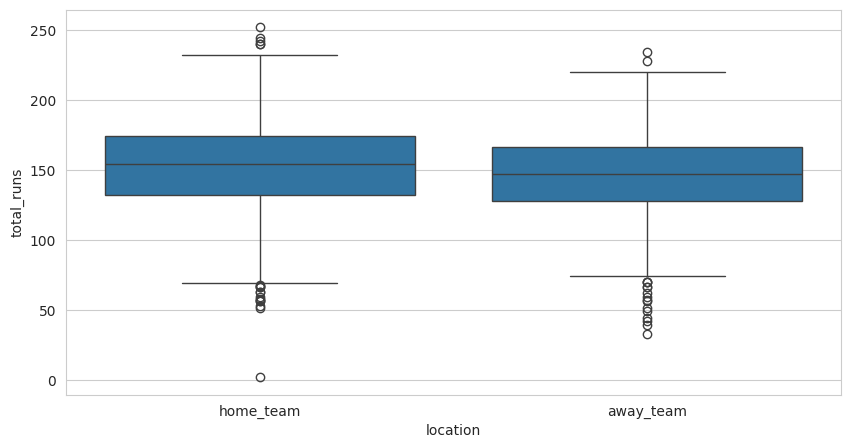

In [ ]:
home_away_df=home_away_df[home_away_df['is_true']]
plt.figure(figsize=(10,5))
sns.boxplot(data=home_away_df,x='location',y='total_runs')
plt.show()

**Conclusion**: there is just a little bit of difference between home and away teams runs, from just looking at the graph!

In [ ]:
home_away_df['Home_or_Away'] = home_away_df['location'].apply(lambda x: 'Home' if x == 'home_team' else 'Away')

home_runs = home_away_df[home_away_df['Home_or_Away'] == 'Home']['total_runs']
away_runs = home_away_df[home_away_df['Home_or_Away'] == 'Away']['total_runs']

statistic, p_value = mannwhitneyu(home_runs, away_runs)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Total Runs between home and away teams.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Total Runs between home and away teams.")

Mann-Whitney U statistic: 581106.0
P-value: 1.2376099361250964e-05
Reject the null hypothesis: There is a significant difference in Total Runs between home and away teams.


**Conclusion**: There is a significant differece between the runs made by home team and away team!        
showing that there might be some advantage to the home team!

# Comparing runs made by each team in pre and post era

In [ ]:
top_scoring_teams = (
merged.groupby(['batting_team', 'period'])['total_runs']
.mean ()
.reset_index()
.sort_values(by=['period', 'total_runs'], ascending=[True, False])
)

top_scoring_teams

,batting_team,period,total_runs
7,Gujarat Titans,post,164.333333
4,Delhi Daredevils,post,160.714286
14,Mumbai Indians,post,160.188889
8,Kings XI Punjab,post,159.857143
17,Punjab Kings,post,158.809524
0,Chennai Super Kings,post,157.728261
13,Lucknow Super Giants,post,157.700000
11,Kolkata Knight Riders,post,157.393258
18,Rajasthan Royals,post,156.329545
22,Royal Challengers Bangalore,post,154.159091


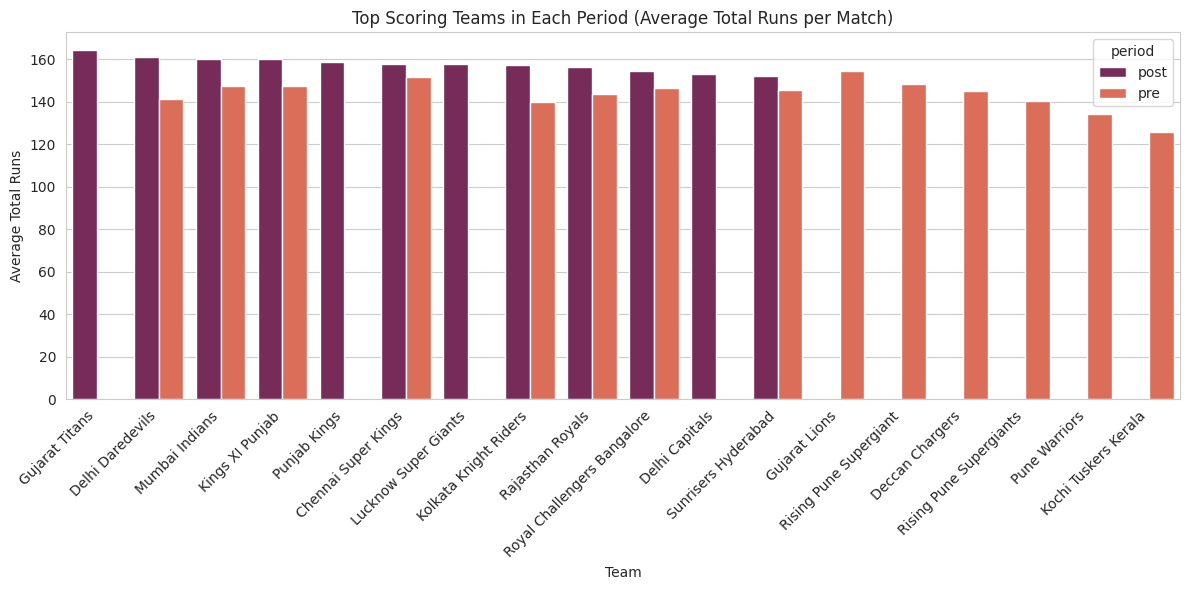

In [ ]:
# Plot the results using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scoring_teams, x='batting_team', y='total_runs', hue='period', palette='rocket')

# Beautify the plot
plt.title("Top Scoring Teams in Each Period (Average Total Runs per Match)")
plt.ylabel("Average Total Runs")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout ()
plt.show()

**Conclusion**: gujrat titans, mumbai indians, delhi daredevils and kings XI punjabs show highes average in the post (recent) era!

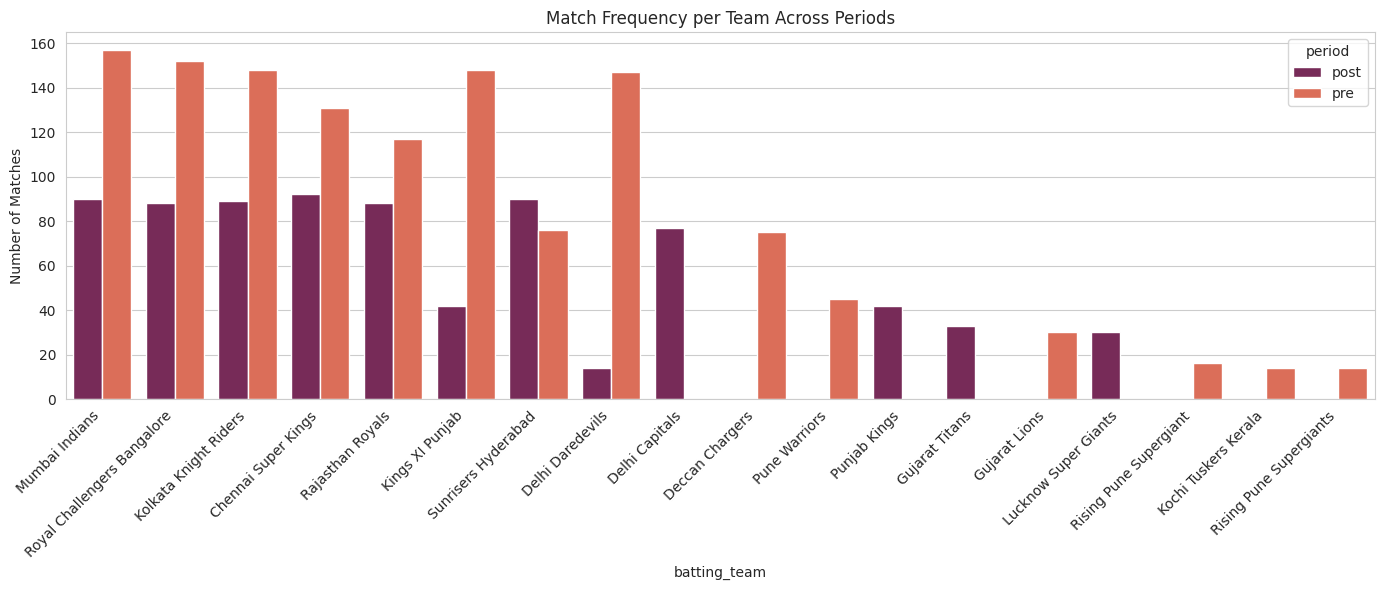

In [ ]:
match_counts = merged.groupby(['batting_team', 'period']).size().reset_index(name='match_count')
team_order = match_counts.groupby('batting_team')['match_count'].sum().sort_values(ascending=False).index

plt.figure(figsize=(14, 6))
sns.barplot(data=match_counts, x='batting_team', y='match_count', hue='period', palette='rocket', order=team_order)

plt.title("Match Frequency per Team Across Periods")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusion**: teams like mumbai indians, royal challengers banglore, chennai super kings and rajasthan royals have played most matches, showing there continous participation in ipl throughout years.       
          
since we dont have enough data about teams like kochi tuskers kerala, rising pune supergiants, we can't make concrete conclusions about those teams!

# Average runs scored in ipl throughout years!

In [ ]:
min_matches=10

match_counts_pivot = match_counts.pivot(index='batting_team', columns='period', values='match_count').fillna(0)

qualified_teams = match_counts_pivot[
(match_counts_pivot.get('pre', 0) >= min_matches) &
(match_counts_pivot.get('post', 0) >= min_matches)
].index.tolist()

qualified_teams

['Chennai Super Kings',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [ ]:
filtered_merges=merged[merged['batting_team'].isin(qualified_teams)]
print("Qualified teams: ",qualified_teams)
print("--------------------------------------------------------------------")
print("Filtered Dataset size", filtered_merges.shape)

Qualified teams:  ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
--------------------------------------------------------------------
Filtered Dataset size (1669, 12)


In [ ]:
filtered_merges.head()

,match_id,batting_team,total_runs,date,team1,team2,period,run rate,year,is_playoff,home_team,away_team
0,335982,Kolkata Knight Riders,205,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,10.25,2008,False,False,True
1,335982,Royal Challengers Bangalore,63,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,3.15,2008,False,True,False
2,335983,Chennai Super Kings,234,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,11.70,2008,False,False,True
3,335983,Kings XI Punjab,196,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,9.80,2008,False,True,False
4,335984,Delhi Daredevils,122,2008-04-19,Delhi Daredevils,Rajasthan Royals,pre,6.10,2008,False,True,False


In [ ]:
merged

,match_id,batting_team,total_runs,date,team1,team2,period,run rate,year,is_playoff,home_team,away_team
0,335982,Kolkata Knight Riders,205,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,10.25,2008,False,False,True
1,335982,Royal Challengers Bangalore,63,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,pre,3.15,2008,False,True,False
2,335983,Chennai Super Kings,234,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,11.70,2008,False,False,True
3,335983,Kings XI Punjab,196,2008-04-19,Kings XI Punjab,Chennai Super Kings,pre,9.80,2008,False,True,False
4,335984,Delhi Daredevils,122,2008-04-19,Delhi Daredevils,Rajasthan Royals,pre,6.10,2008,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2040,1370351,Mumbai Indians,166,2023-05-24,Mumbai Indians,Lucknow Super Giants,post,8.30,2023,True,True,False
2041,1370352,Gujarat Titans,223,2023-05-26,Gujarat Titans,Mumbai Indians,post,11.15,2023,True,True,False
2042,1370352,Mumbai Indians,164,2023-05-26,Gujarat Titans,Mumbai Indians,post,8.20,2023,True,False,True
2043,1370353,Chennai Super Kings,166,2023-05-29,Gujarat Titans,Chennai Super Kings,post,8.30,2023,True,False,True


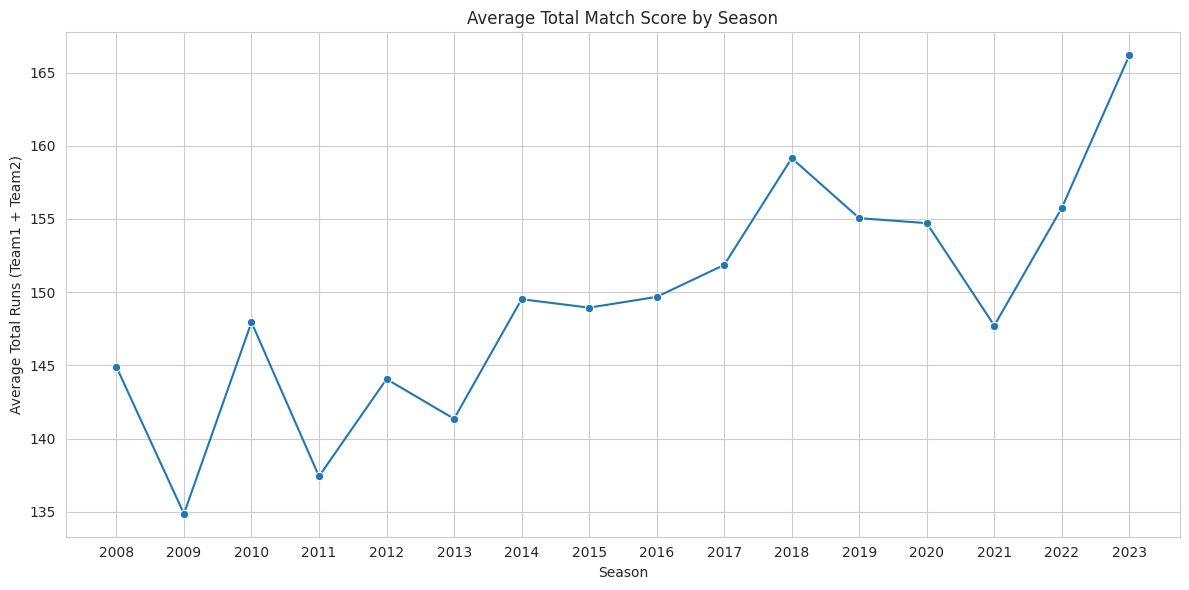

In [ ]:
avg_score_each_year = merged.groupby('year')['total_runs'].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.lineplot(data = avg_score_each_year, x = 'year', y = 'total_runs', marker = 'o')
plt.title("Average Total Match Score by Season")
plt.xlabel("Season")
plt.ylabel("Average Total Runs (Team1 + Team2)")
plt.xticks(avg_score_each_year['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion**: Average runs made in ipl throughout years have increased slowly!

# Average runs scored throughout years by top competing teams!

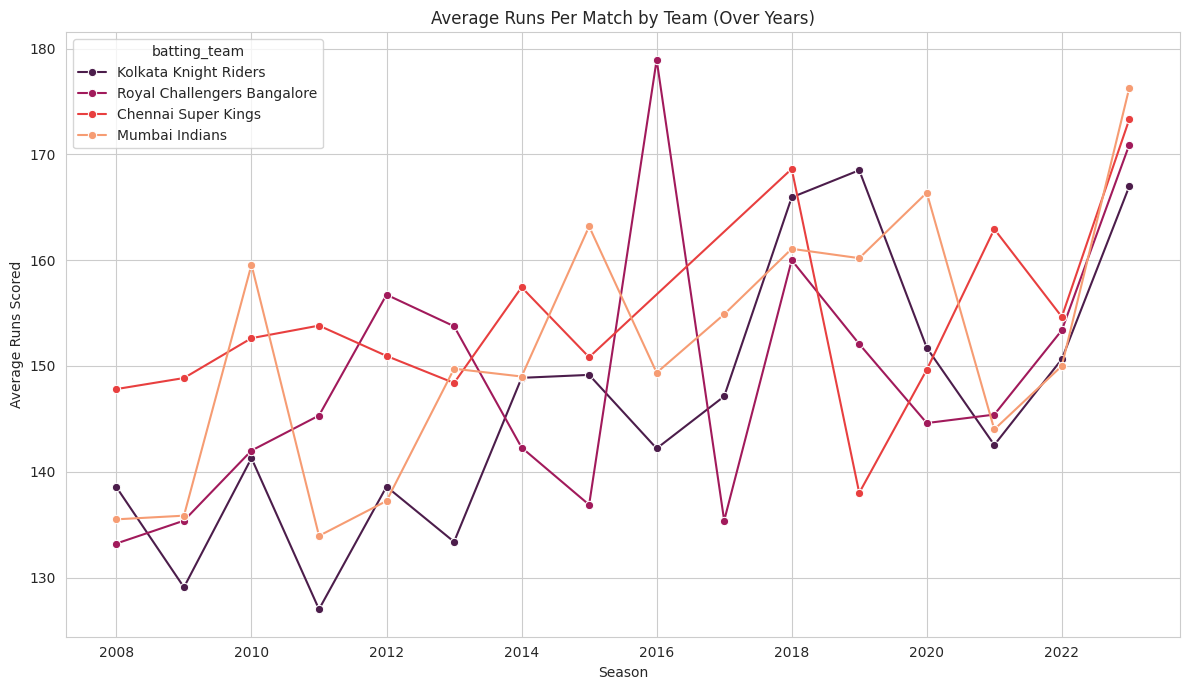

In [ ]:
top_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders']

filtered_teams_data = merged[merged['batting_team'].isin(top_teams)]

filtered_teams_data.groupby(['batting_team','year'])['total_runs'].mean().reset_index()

plt.figure(figsize=(12,7))
sns.lineplot(x='year', y='total_runs', hue='batting_team', palette='rocket', data=filtered_teams_data, marker='o', errorbar=None)

plt.title("Average Runs Per Match by Team (Over Years)")
plt.xlabel("Season")
plt.ylabel("Average Runs Scored")
plt.tight_layout()
plt.show()

**Conclusion**: Avg runs made by top competing teams have increased over the years

# Comparing the runs made over pre and post era

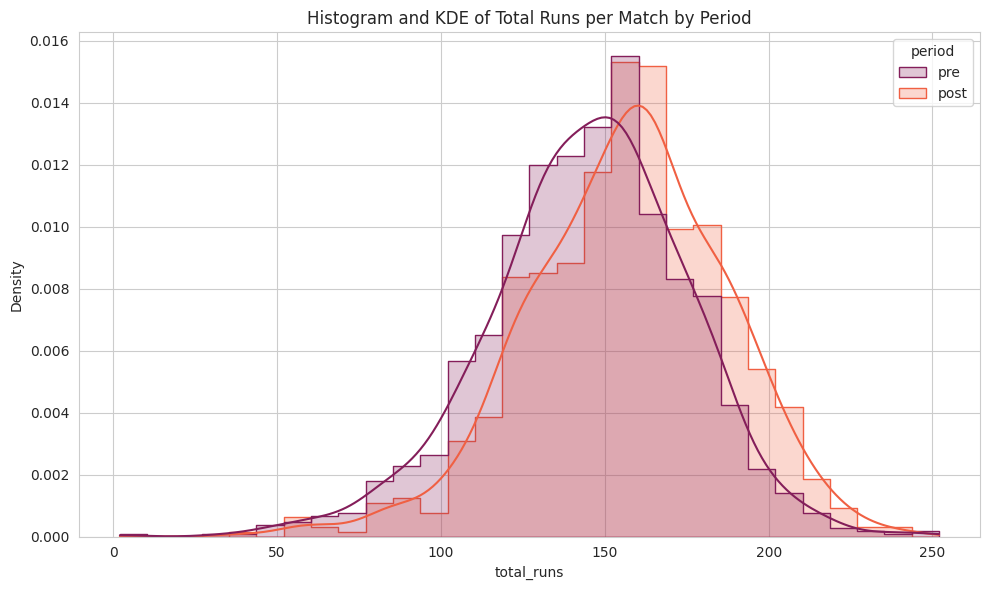

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged, x='total_runs', hue='period', palette='rocket', element='step', stat='density',common_norm=False, kde=True, bins=30)
plt.title("Histogram and KDE of Total Runs per Match by Period")
plt.tight_layout()
plt.show()

**Conclusion**: there seems to be some difference in runs made in pre and post era!

In [ ]:
# applying Mann-Whitney U test

pre_scores = merged[merged['period']=='pre']['total_runs']
post_scores = merged[merged['period']=='post']['total_runs']

u_stat,p_val=mannwhitneyu(pre_scores,post_scores,alternative='two-sided')
print("Mann-whitney U Test : U-statistic=",u_stat,"p-value",p_val)

Mann-whitney U Test : U-statistic= 381621.5 p-value 1.454889995517028e-17


**Conclusion**: There is significant differece betweeen runs made in pre and post era!

In [ ]:
# applying cohen d test

def cohen_d(x,y):
  nx=len(x)
  ny=len(y)
  dof=nx+ny-2
  pooled_std=np.sqrt(((nx-1)*np.std(x,ddof=1)**2+(ny-1)*np.std(y,ddof=1)**2)/dof)
  return (np.mean(x)-np.mean(y))/pooled_std
effect_size=cohen_d(post_scores,pre_scores)
print(effect_size)

0.3901739611740549


**Conclusion**: Cohen’s d value of 0.39 indicates a **small to moderate** difference in match scores between the two periods. So, while the increase in runs is **statistically significant**, the actual increase per match is **noticeable but not very large**. Teams are scoring more after 2018, but the change is **moderate**, not dramatic.

In [ ]:
# Bootstrap Confidence Interval

def bootstrap_diff_means(x, y, n_bootstrap=1000):
    diffs = [np.mean(resample(y)) - np.mean(resample(x)) for _ in range(n_bootstrap)]
    return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

ci_bounds, mean_diff = bootstrap_diff_means(pre_scores, post_scores)
print("95% Confidence Interval:", ci_bounds, "\nMean Difference:", mean_diff)

95% Confidence Interval: [ 9.25544196 14.54133782] 
Mean Difference: 11.932338862077724


**Conclusion**: The result shows that matches in the post period have, on average, about 11.96 more runs than in the pre period. We are 95% confident that the true difference lies between 9.15 and 14.77 runs. This suggests a consistent increase in scoring, with most matches seeing 10 to 15 more runs after the split.

In [ ]:
# Linear Regression
seasonal_data = merged.groupby('year')['total_runs'].mean().reset_index()

X = sm.add_constant(seasonal_data['year'])  # Adding intercept to the model
y = seasonal_data['total_runs']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_runs   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     25.68
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           0.000172
Time:                        05:33:21   Log-Likelihood:                -47.087
No. Observations:                  16   AIC:                             98.17
Df Residuals:                      14   BIC:                             99.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2569.0983    536.414     -4.789      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Conclusion**: This linear regression shows that total runs per match have increased over the years. The R-squared value of 0.647 means about 65% of the change in scores is explained by the year. A very small p-value confirms the trend is statistically significant. The year coefficient of 1.35 means match scores go up by about 1.35 runs each year on average, showing a clear upward trend in scoring over time.

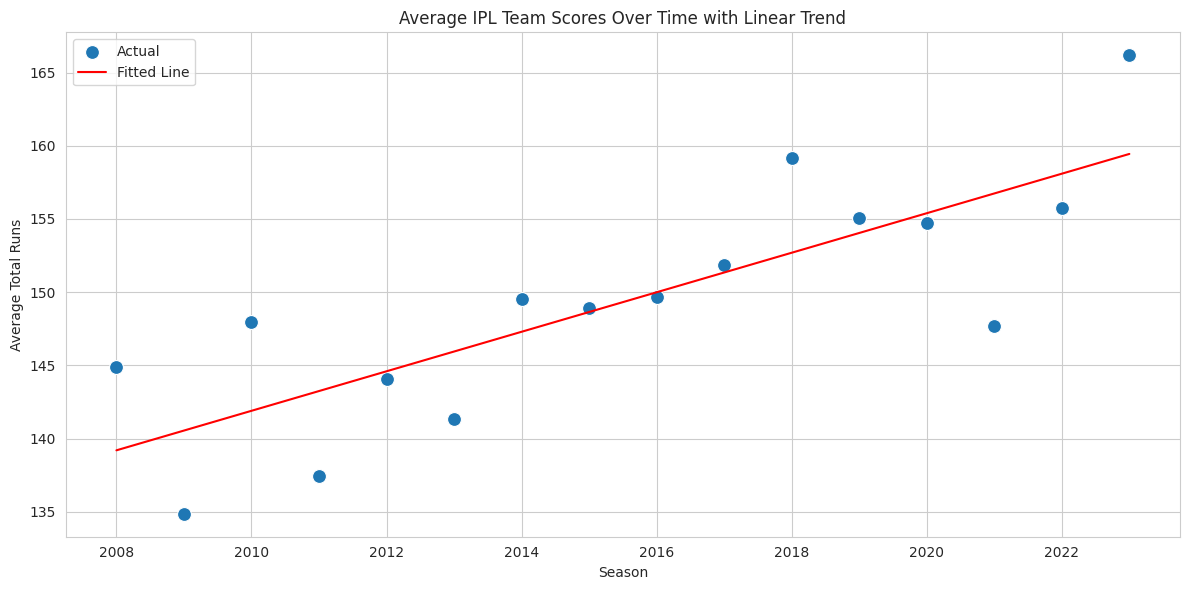

In [ ]:
# Predict values using the model
seasonal_data['predicted'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=seasonal_data, x='year', y='total_runs', label='Actual', s=100)
# Changed plt.lineplot to sns.lineplot
sns.lineplot(data=seasonal_data, x='year', y='predicted', label='Fitted Line', color='red')

plt.title("Average IPL Team Scores Over Time with Linear Trend")
plt.xlabel('Season')
plt.ylabel('Average Total Runs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Conclusions**: This chart shows that average IPL team scores have generally increased over the years. The blue dots represent actual season-wise scores, while the red trend line from the linear regression model shows predicted scores. The upward slope of the line confirms a clear long-term rise in team scoring performance, despite some yearly fluctuations.

## Summary and Conclusion:

This project analyzed IPL team scoring trends from 2008 to 2023 using stats and visuals.

After cleaning and combining the data, I compared team scores before and after 2018.

The Mann-Whitney U test showed a significant increase in scores after 2018 (p ≈ 1.45e-17).

Cohen's d value of 0.39 suggests the impact is small to moderate.

The bootstrap confidence interval (around 9.15 to 14.77 runs) confirmed this increase.

A linear regression model (R² = 0.647) also showed a clear upward trend in scores over time.

Overall, IPL matches have become more high-scoring in recent years, possibly due to better strategies, rule changes, or pitch conditions.
